In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Машинное обучение и интеллектуальные системы
## Лекция 4. Вероятностные модели

### Типы моделей

**Математическая модель** - описывает отношение между переменными в функциональной или логической форме. Пример:
$$y = f(x) + b$$

**Вероятностная модель** - описывает распределение вероятности над значениями переменных вместо детерминированных отношений.
<br> Пример:
$$P(X=x|Y=y) = f(Y, a)$$

**Статистическая модель** - это математическая модель, которая может меняться в зависимости от того, какие данные используются при её построении. Практически синонимом является понятие "**обучаемая модель**". Введем также понятие **обученная модель** - результат обучения обучаемой модели.

**Алгоритм обучения** берет на вход набор данных и множество возможных моделей(**гипотез**) и выбирает из этого множества наиболее подходящую (обычно)

В рамках одной обучаемой модели множество возможных результирующих моделей называется **пространством гипотез** 

### Примеры пространств гипотез

#### Модель линейной регрессии:
<br>Допустим, у нас 5 признаков. Тогда пространство гипотез - это множество функций вида:
$$f(\vec{x};\vec{w}, b) = w_1x_1 + w_2x_2 + ... + w_5x_5 + b$$
Форма функции определяется значениями параметров $\vec{w}$ и $b$. Обучаемая модель, у которой пространство гипотез полностью определяется ограниченным числом параметров, называется **параметрической**.
#### Модель деревьев решений
Пространство гипотез этой модели - это множество деревьев решений, которые можно построить для поданных на вход данных (считаем, что входные атрибуты зафиксированы, но не все их возможные значения). Чем больше данных, тем больше деревьев можно построить. Модели, простраство гипотез которых не ограничено параметрами и может зависеть от данных называются **непараметрическими**. 
#### K-ближайших соседей
Модель ближайших соседей очень проста.<br> 
При "обучении" все примеры данных просто запоминаются.
Далее, когда нужно сделать предсказание на новых данных:
- Ищем K тренировочных экземпляров данных, ближайших по какой-либо метрике к тому, который мы обрабатываем
- Для классификации: Выбираем из этих K экземпляров доминирующий класс. Или рассматриваем их пропорции как вероятности
- Для регрессии: Усредняем или как-то иначе получаем предсказание на основе K экземпляров

Это самый известный пример непараметрической модели. Чем больше данных, тем больше сама модель

In [2]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [3]:
davis_df = pd.read_csv("datasets_68743_137592_Davis.csv")

In [4]:
davis_df.head(5)

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


In [5]:
davis_train = davis_df[:50]

In [6]:
davis_train = davis_train[davis_train["height"] > 140]

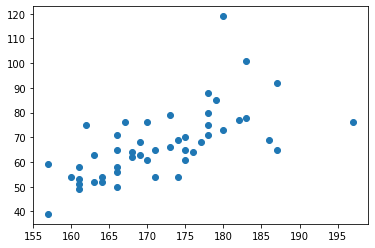

In [7]:
plt.scatter(davis_train["height"], davis_train["weight"])

In [16]:
k_neighbors_reg = KNeighborsRegressor(n_neighbors=10)
lreg = LinearRegression()

reg_x_train = davis_train[["height"]].values.astype(np.float)
reg_y_train = davis_train["weight"].values.astype(np.float)

In [17]:
print("x")
print(reg_x_train[:5])
print("y")
print(reg_y_train[:5])

x
[[182.]
 [161.]
 [161.]
 [177.]
 [157.]]
y
[77. 58. 53. 68. 59.]


In [23]:
50 ** 10

97656250000000000

In [24]:
5 ** 10

9765625

In [18]:
k_neighbors_reg.fit(reg_x_train,reg_y_train)

KNeighborsRegressor(n_neighbors=10)

In [19]:
lreg.fit(reg_x_train, reg_y_train)

LinearRegression()

In [20]:
x_to_pred = np.linspace(reg_x_train.min(), reg_x_train.max(),30).reshape(-1,1)

In [21]:
lreg_pred = lreg.predict(x_to_pred)
kn_pred = k_neighbors_reg.predict(x_to_pred)

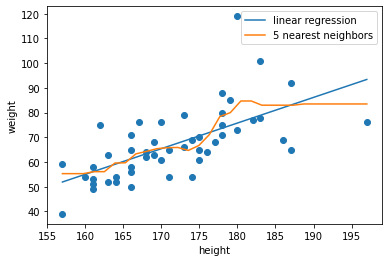

In [22]:
plt.scatter(davis_train["height"], davis_train["weight"])
plt.plot(x_to_pred[:,0], lreg_pred,label="linear regression")
plt.plot(x_to_pred[:,0], kn_pred, label="5 nearest neighbors")
plt.xlabel("height")
plt.ylabel("weight")
plt.legend()
plt.show()

### Выбор гипотезы. Метод максимального правдоподобия. MAP-оценка. Байесов вывод.

Гипотеза (результирующая модель) оценивается с точки зрения таких аргументов, как:
- Наши знания о том, насколько правдоподобна гипотеза
- Способность гипотезы объяснить данные
- Возможность протестировать и, возможно, опровергнуть гипотезу...

Рассмотрим простую задачу:
Производитель конфет поставляет их в одной упаковке сразу с двумя вкусами (яблоко и вишня). При этом сортировка может размещаться в 5 вариантах:
- Все конфеты вишневые 
- 25% вишневых, 75% яблочных 
- 50 на 50 
- 75% вишневых, 25% яблочных 
- 100% вишневых

Будем рассматривать эти варианты как гипотезы и, вытаскивая конфеты, попытаемся выбрать правильную.

In [26]:
import cv2

In [27]:
cherry = np.array([0.,0.25,0.5,0.75,1.0])
apple = 1 - cherry
proportions = np.column_stack((cherry, apple))
print(proportions)

[[0.   1.  ]
 [0.25 0.75]
 [0.5  0.5 ]
 [0.75 0.25]
 [1.   0.  ]]


In [29]:
0.008 / 0.107

0.07476635514018692

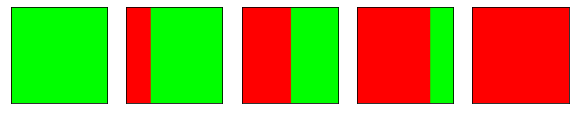

In [28]:
fig = plt.figure(figsize=(10,2))
for h in range(5):
    blank_image = np.zeros((200,200,3), np.uint8)
    ch, app = tuple(proportions[h])
#     print(ch,app)
    cv2.rectangle(blank_image, (0,0), (int(ch * 200),200), (255,0,0),-1)
    cv2.rectangle(blank_image, (int(ch*200)+1,0), (200,200), (0,255,0),-1)
    ax = fig.add_subplot(1,5,h+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(blank_image)

Как оценить вероятность гипотезы при наблюдении данных?<br>
Введём случайные величины:

$H$  - гипотеза. В нашем случае у этой величины всего 5 значений и она дискретна. <br>
$\vec{x} = (x_1, x_2, ..., x_n)$ - последовательность наблюдений. В нашем случае каждое наблюдение - это одна вытащенная конфета, т.е. $x_i = \text{cherry}$ или $x_i = \text{apple}$.<br>
Мы предполагаем, что наблюдения не зависят друг от друга при известной верной гипотезе. Т.е. 
$$P(X_i=x_i, X_j = x_j|H=h) = P(X_i=x_i|H=h) P(X_j=x_j|H=h)$$
Также вероятность значения наблюдения не зависит от номера этого наблюдения.

Далее, используя строчные буквы будем обозначать $P(Y=y)$ как $P(y)$. Т.е. предыдущая формула примет вид:
$$P(x_i, x_j|h) = P(x_i|h) P(x_j|h)$$

Согласно формуле Байеса, вероятность гипотезы при имеющихся наблюдений определяется следующим образом:

$$P(h_i|\vec{x}) = \frac{P(h_i)P(\vec{x}|h_i)}{P(x)}$$

Рассмотрим составляющие формулы по отдельности:

$P(h)$ - это априорная вероятность гипотезы. Т.е. это та вероятность, которую мы ей назначаем еще не увидев данных. Априорное распределение отражает наши знания или предпочтения или может строиться на основе ранее подсчитанных пропорций. Например, в нашем случае, мы можем обладать данными о том, что $P(H) = \{0.1, 0.2, 0.4, 0.2, 0.1\}$, т.е. чаще всего встречаются упаковки с одинаковыми количествами конфет и реже всего - только с вишней или яблоком.

$P(h|\vec{x})$ - называется апостериорной вероятностью. Это вероятность гипотезы, которой она обладает в нашей модели после того, как мы увидели какую-то часть данных. Каждое последующее наблюдение (конфета) может изменить апостериорное распределение (уменьшить или увеличить вероятность гипотез). В частности, одной вишневой конфеты достаточно для того, чтобы отвергнуть гипотезу 1 (все конфеты яблочные)

$P(\vec{x}|h)$ - называется **правдоподобием**. Это вероятность, с которой мы можем получить данные \vec{x}, при условии, что гипотеза h верна.

$P(\vec{x})$ в знаменателе - это вероятность полученных наблюдений независимо от того, какая гипотеза верна. Данная величина служит в формуле нормализационной константой, благодаря которой апостериорные вероятности гипотез $P(h|\vec{x})$ складываются в единицу. В дискретном случае - эта сумма значений числителя для всех гипотез, в непрерывном - интеграл по всем гипотезам. В нашем случае эта константа равняется:
$$P(\vec{x}) = \sum_{j=1}^5 P(h_j,\vec{x}) = \sum_{j=1}^5 P(h_j)P(\vec{x}|h_j)$$
Таким образом итоговая апостериорная вероятность равняется:
$$P(h_i|\vec{x}) = \frac{P(h_i)P(\vec{x}|h_i)}{\sum_{j=1}^5 P(h_j)P(\vec{x}|h_j)}$$


Существует три основных метода отбора гипотезы:
- Метод максимального правдоподобия
- Байесов вывод
- MAP-оценка (гипотеза с максимальной апостериорной вероятностью)

**Метод максимального правдоподобия** выбирает гипотезу $h$, для которой величина $P(\vec{x}|h)$ (правдоподобие) максимальна.
Напомним наши гипотезы:
- Все конфеты яблочные ($h_1$)
- 25% вишневых, 75% яблочных ($h_2$)
- 50 на 50 ($h_3$)
- 75% вишневых, 25% яблочных ($h_4$)
- 100% вишневых ($h_5$)


Рассмотрим серию наблюдений (вытащенных конфет) **(вишня, вишня, вишня, яблоко, вишня, яблоко, яблоко)**

Расчитаем правдопобия, которые мы получим после просмотра 1, 2, ..., 7 конфет

In [68]:
xs = ('вишня', 'вишня', 'вишня', 'яблоко', 'вишня', 'яблоко', 'яблоко')
flavor_to_num = {'вишня':0, 'яблоко':1}

In [71]:
xs_array = np.array([flavor_to_num[x] for x in xs])
xs_array

array([0, 0, 0, 1, 0, 1, 1])

In [73]:
for h in proportions:
    probs = h[xs_array]
    print(probs)

[0. 0. 0. 1. 0. 1. 1.]
[0.25 0.25 0.25 0.75 0.25 0.75 0.75]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5]
[0.75 0.75 0.75 0.25 0.75 0.25 0.25]
[1. 1. 1. 0. 1. 0. 0.]


In [77]:
likelihood_dict = {'конфета': xs}
for i, h in enumerate(proportions,1):
    likelihoods = np.cumprod(h[xs_array])
    likelihood_dict[f"h_{i}"] = likelihoods

In [78]:
pd.DataFrame(likelihood_dict)

,конфета,h_1,h_2,h_3,h_4,h_5
0,вишня,0.0,0.250000,0.500000,0.750000,1.0
1,вишня,0.0,0.062500,0.250000,0.562500,1.0
2,вишня,0.0,0.015625,0.125000,0.421875,1.0
3,яблоко,0.0,0.011719,0.062500,0.105469,0.0
4,вишня,0.0,0.002930,0.031250,0.079102,0.0
5,яблоко,0.0,0.002197,0.015625,0.019775,0.0
6,яблоко,0.0,0.001648,0.007812,0.004944,0.0


После 7 наблюдений мы можем выбрать гипотезу h_3 как самую правдоподобную по этому критерию (к этому моменту мы пронаблюдали 4 вишневых и 3 яблочных конфеты). При этом наиболее вероятной гипотезой в течении первых 3 наблюдений была гипотеза 5 (всё вишнёвое). 

Это опасно, поскольку принимая гипотезу только по данным, особенно по небольшому их числу, мы рискуем делать некорректные предсказания с её использованием. После трех конфет, приняв наиболее вероятную гипотезу по критерию макс. правдоподобия, мы бы считали яблочные конфеты невозможными в данном пакете.

Напомним, что в данном методы мы полностью игнорировали априорные вероятности. Напомним, они назначены как:
$P(H) = \{0.1, 0.2, 0.4, 0.2, 0.1\}$

Рассмотрим наиболее противоложный подход - **Байесов вывод**. В данном подходе мы не ищем одну наиболее подходящую гипотезу. Вместо этого мы строим полное апостериорное распределение и делаем предсказания с его помощью. 

Допустим, нам нужно предсказать k-ю конфету, увидев k-1 предыдущих. Если бы мы использовали метод максимального правдоподобия, мы бы предсказывали конфету при помощи отобранной одной гипотезы $h_{\text{ML}}$:
$$P(x_k|x_1,...,x_{k-1}) = P(x_k|h_{\text{ML}})$$

В Байесовом выводе мы используем апостериорное распределение и таким образом в наших предсказаниях учитывается неопределенность истинной гипотезы:
$$P(x_k|x_1,...,x_{k-1}) = \sum_{i=1}^5 P(h_i|x_1,...,x_{k-1})P(x_k|h_i)$$

Рассмотрев формулу Байеса ещё раз:
$$P(h_i|\vec{x}) = \frac{P(h_i)P(\vec{x}|h_i)}{\sum_{j=1}^5 P(h_j)P(\vec{x}|h_j)}$$

мы можем прийти к выводу, что максимальной апостериорной вероятностью обладает та гипотеза, у которой максимальный числитель, т.е. гипотеза

$$h^* = \underset{h_j}{\operatorname{argmax}}P(h_j)P(\vec{x}|h_j)$$
Эта гипотеза называется MAP-гипотезой (Maximum-a-posteriori). Выбор гипотезы через этот метод позволяет учитывать априорные вероятности, но при этом предполагает выбор одной гипотезы $h_{\text{MAP}}$ и осуществление предсказаний в предположении её истинности.
$$P(x_k|x_1,...,x_{k-1}) = P(x_k|h_{\text{MAP}})$$

Сравним вероятности гипотез и вероятности значений следующей конфеты для этих троих методов

In [92]:
likelihood_dict = {'конфета': xs}
likelihood_mtr = np.zeros((len(xs),len(proportions)))
for i, h in enumerate(proportions,1):
    likelihoods = np.cumprod(h[xs_array])
    likelihood_mtr[:,i-1] = likelihoods
    likelihood_dict[f"h_{i}"] = likelihoods
    
likelihood_dict["t+1=вишня"] = []
likelihood_dict["t+1=яблоко"] = []

for t,x in enumerate(xs):
    ml_h = np.argmax(likelihood_mtr[t])
    likelihood_dict["t+1=вишня"].append(proportions[ml_h,0])
    likelihood_dict["t+1=яблоко"].append(proportions[ml_h,1])

#### Метод максимального правдоподобия

In [93]:
pd.DataFrame(likelihood_dict)

,конфета,h_1,h_2,h_3,h_4,h_5,t+1=вишня,t+1=яблоко
0,вишня,0.0,0.250000,0.500000,0.750000,1.0,1.00,0.00
1,вишня,0.0,0.062500,0.250000,0.562500,1.0,1.00,0.00
2,вишня,0.0,0.015625,0.125000,0.421875,1.0,1.00,0.00
3,яблоко,0.0,0.011719,0.062500,0.105469,0.0,0.75,0.25
4,вишня,0.0,0.002930,0.031250,0.079102,0.0,0.75,0.25
5,яблоко,0.0,0.002197,0.015625,0.019775,0.0,0.75,0.25
6,яблоко,0.0,0.001648,0.007812,0.004944,0.0,0.50,0.50


In [94]:
priors = np.array([0.1,0.2,0.4,0.2,0.1])

In [95]:
map_dict = {'конфета': xs}
map_mtr = np.zeros((len(xs),len(proportions)))
for i, h in enumerate(proportions,1):
    likelihoods = np.cumprod(h[xs_array]) * priors[i-1]
    map_mtr[:,i-1] = likelihoods
    map_dict[f"h_{i}"] = likelihoods
    
map_dict["t+1=вишня"] = []
map_dict["t+1=яблоко"] = []

for t,x in enumerate(xs):
    map_h = np.argmax(map_mtr[t])
    map_dict["t+1=вишня"].append(proportions[map_h,0])
    map_dict["t+1=яблоко"].append(proportions[map_h,1])

#### Метод Maximum-a-Posteriori

In [96]:
pd.DataFrame(map_dict)

,конфета,h_1,h_2,h_3,h_4,h_5,t+1=вишня,t+1=яблоко
0,вишня,0.0,0.050000,0.200000,0.150000,0.1,0.50,0.50
1,вишня,0.0,0.012500,0.100000,0.112500,0.1,0.75,0.25
2,вишня,0.0,0.003125,0.050000,0.084375,0.1,1.00,0.00
3,яблоко,0.0,0.002344,0.025000,0.021094,0.0,0.50,0.50
4,вишня,0.0,0.000586,0.012500,0.015820,0.0,0.75,0.25
5,яблоко,0.0,0.000439,0.006250,0.003955,0.0,0.50,0.50
6,яблоко,0.0,0.000330,0.003125,0.000989,0.0,0.50,0.50


In [99]:
bayes_dict = {'конфета': xs}
bayes_mtr = np.zeros((len(xs),len(proportions)))
for i, h in enumerate(proportions,1):
    likelihoods = np.cumprod(h[xs_array]) * priors[i-1]
    bayes_mtr[:,i-1] = likelihoods
    
bayes_mtr = bayes_mtr / bayes_mtr.sum(axis=1, keepdims=True)
for i, h in enumerate(proportions,1):
    bayes_dict[f"h_{i}"] = bayes_mtr[:,i-1]
    
bayes_dict["t+1=вишня"] = []
bayes_dict["t+1=яблоко"] = []

for t,x in enumerate(xs):
    prediction_cherry = np.dot(bayes_mtr[t],proportions[:,0])
    prediction_apple = np.dot(bayes_mtr[t],proportions[:,1])
    map_h = np.argmax(bayes_mtr[t])
    
    bayes_dict["t+1=вишня"].append(prediction_cherry)
    bayes_dict["t+1=яблоко"].append(prediction_apple)

#### Байесов вывод

In [102]:
pd.DataFrame(bayes_dict)

,конфета,h_1,h_2,h_3,h_4,h_5,t+1=вишня,t+1=яблоко
0,вишня,0.0,0.100000,0.400000,0.300000,0.200000,0.650000,0.350000
1,вишня,0.0,0.038462,0.307692,0.346154,0.307692,0.730769,0.269231
2,вишня,0.0,0.013158,0.210526,0.355263,0.421053,0.796053,0.203947
3,яблоко,0.0,0.048387,0.516129,0.435484,0.000000,0.596774,0.403226
4,вишня,0.0,0.020270,0.432432,0.547297,0.000000,0.631757,0.368243
5,яблоко,0.0,0.041284,0.587156,0.371560,0.000000,0.582569,0.417431
6,яблоко,0.0,0.074176,0.703297,0.222527,0.000000,0.537088,0.462912


Вопросы:

1. Почему мы не используем везде Байесов вывод?

2. Что закладывается в априорную вероятность? Какие есть универсальные принципы, по которым мы можем предпочитать одну гипотезу другой?

## Часть 2. Применение принципов в реальных моделях

### Наивный Байесовский классификатор

Это классификатор, предполагающий, что признаки входного экземпляра не зависят друг от друга при известном классе

Предсказание класса для примера $\vec{x}$ осуществляется по формуле:
$$P(c|\vec{x}) = \frac{1}{Z}P(c)P(\vec{x}|c) = \frac{1}{Z}P(c)P(x_1|c),...,P(x_m|c) = \frac{1}{Z}P(c)\prod_{i=1}^m {P(x_i|c)}$$
Где $$Z = \sum_{c'}P(c')\prod_{i=1}^m {P(x_i|c')}$$

Для обучения классификатора необходимо оценить величины $P(c)$ для каждого класса $c$ и $P(x_i|c)$ для каждой пары ( признак $x_i$, класс $c$). Для этого часто достаточно подсчитать вывести эти величины из данных путем простого подсчета.

Отдельный случай - классификация текстов

Рассмотрим тексты в формате мешок слов - каждый текст представляется как набор счетчиков для слов из некоторого словаря. Заполнить словарь можно предварительно, а можно на основе данных. 


Пусть в словаре находятся слова **\[сообщают, пользователи, социальных, сетей, землетрясение, толчок, афтершок, произошел, квартирах, мебель, посуда \]**. Итого 11 слов. Тогда тексты будут представляться следующими векторами:

*Как сообщают пользователи социальных сетей, землетрясение ощущалось как на первых, так и на верхних этажах*

\[1,1,1,1,1,0,0,0,0,0,0\]

*Некоторые сообщают о том, что в квартирах ходуном заходила мебель, зазвонила посуда*

\[1,0,0,0,0,0,0,0,1,1,1\]

В таком случае, Наивный Байесовский классификатор может оценить вероятности следующим образом:

$p(c)$ = пропорция класса $c$ в датасете
<br>
$p(x_i|c)$ - при предсказании мы рассматриваем признаки $X_i$ как бинарные (есть слово, нет слово). Но при обучении мы также смотрим, сколько раз слово встретилось в каждом тексте. 

Мы можем оценить вероятность $p(x_i|c)$ как пропорцию слов:
$$\frac{N(x_i,c) + \alpha}{\sum_j{[N(x_j,c) + \alpha}]}$$

$N(x_i,c)$ - количество раз, которые слово $x_i$ встретилось во всех текстах класса $c$

In [105]:
from sklearn.datasets import fetch_20newsgroups

In [112]:
ng_train = fetch_20newsgroups(subset='train',return_X_y=False)

In [113]:
ng_test = fetch_20newsgroups(subset='test',return_X_y=False)

In [114]:
ng_train.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [115]:
from sklearn.feature_extraction.text import CountVectorizer

In [122]:
vectorizer = CountVectorizer( max_df=0.5,max_features=20000,
                                 stop_words='english')

In [123]:
X_train = vectorizer.fit_transform(ng_train.data)

In [138]:
X_test = vectorizer.transform(ng_test.data)

In [124]:
X_train.shape

(11314, 20000)

In [131]:
feature_names = np.array(vectorizer.get_feature_names())

In [132]:
X_train[0].indices

array([19193, 18476, 17856,  3962, 12656, 14047,  9084, 18582, 11493,
        4639, 13432,   204, 19517,  6917, 15852,  5634,  6365, 16865,
       11100, 10707,  1089,  6597,  1242,  3887,  6366, 14873, 16571,
        1887,  3735, 16127, 15274,  3435, 10514, 12033,  6897, 16788,
       19821, 14288,  8952,  9566, 11101, 11328, 17810,  9329,  3657,
       12495])

In [133]:
type(feature_names)

numpy.ndarray

In [134]:
print(feature_names[X_train[0].indices])

['wam' 'umd' 'thing' 'car' 'nntp' 'posting' 'host' 'university' 'maryland'
 'college' 'park' '15' 'wondering' 'enlighten' 'saw' 'day' 'door' 'sports'
 'looked' 'late' '60s' 'early' '70s' 'called' 'doors' 'really' 'small'
 'addition' 'bumper' 'separate' 'rest' 'body' 'know' 'model' 'engine'
 'specs' 'years' 'production' 'history' 'info' 'looking' 'mail' 'thanks'
 'il' 'brought' 'neighborhood']


In [141]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics, linear_model

In [137]:
clf = MultinomialNB().fit(X_train, ng_train.target)

In [140]:
y_pred = clf.predict(X_test)

In [142]:
print(metrics.classification_report(ng_test.target, y_pred, target_names=ng_train.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.77      0.82      0.79       319
           comp.graphics       0.57      0.82      0.68       389
 comp.os.ms-windows.misc       0.20      0.00      0.01       394
comp.sys.ibm.pc.hardware       0.52      0.77      0.62       392
   comp.sys.mac.hardware       0.75      0.85      0.80       385
          comp.windows.x       0.79      0.75      0.77       395
            misc.forsale       0.80      0.83      0.82       390
               rec.autos       0.84      0.91      0.87       396
         rec.motorcycles       0.91      0.94      0.93       398
      rec.sport.baseball       0.94      0.92      0.93       397
        rec.sport.hockey       0.95      0.96      0.96       399
               sci.crypt       0.91      0.90      0.91       396
         sci.electronics       0.75      0.73      0.74       393
                 sci.med       0.91      0.83      0.87       396
         

In [145]:
nb_conf_matrix = pd.DataFrame(metrics.confusion_matrix(ng_test.target, y_pred),columns=ng_train.target_names, 
                              index=ng_train.target_names)

In [146]:
nb_conf_matrix

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
alt.atheism,262,0,0,1,0,1,1,1,2,1,2,1,1,5,1,13,2,3,1,21
comp.graphics,1,320,0,14,9,12,4,0,0,3,0,7,8,1,7,0,0,1,1,1
comp.os.ms-windows.misc,0,97,1,161,38,53,4,5,5,3,1,3,4,0,7,0,0,0,6,6
comp.sys.ibm.pc.hardware,0,8,1,303,34,3,12,4,1,1,0,1,20,0,4,0,0,0,0,0
comp.sys.mac.hardware,0,8,1,17,328,0,7,1,2,3,0,2,12,2,2,0,0,0,0,0
comp.windows.x,1,64,2,15,2,297,3,0,1,1,0,0,1,3,4,0,1,0,0,0
misc.forsale,0,2,0,23,13,0,324,11,2,0,2,0,8,3,1,0,0,0,1,0
rec.autos,1,1,0,3,1,0,8,359,6,1,2,0,9,0,2,0,1,0,2,0
rec.motorcycles,0,0,0,1,0,0,4,11,375,1,0,0,4,0,0,0,1,0,1,0
rec.sport.baseball,2,0,0,0,1,0,7,5,0,365,12,0,1,0,2,0,1,1,0,0


In [148]:
print(clf.coef_.shape)

(20, 20000)


Оцененные вероятности можно отобразить, они пропорциональны количеству употреблений слов

In [153]:
probs = clf.coef_

In [154]:
print(probs)

[[-10.06429815  -7.89524445 -11.45059251 ... -11.45059251 -11.45059251
  -11.45059251]
 [ -7.86431014  -8.52928644 -11.4196582  ...  -9.02176292 -10.32104591
  -11.4196582 ]
 [ -8.72843562  -9.85690087 -12.25479614 ... -12.25479614 -12.25479614
   -9.25906387]
 ...
 [ -8.37239181  -6.56603354 -11.89875233 ... -11.89875233 -11.89875233
  -11.89875233]
 [ -8.29547965  -7.4000956  -11.66277548 ... -11.66277548 -11.66277548
  -11.66277548]
 [ -9.67236223  -8.39142839 -10.58865296 ... -11.28180014 -11.28180014
  -11.28180014]]


In [155]:
type(ng_train.target_names)

list

In [158]:
for c in range(len(probs)):
    print(ng_train.target_names[c])
    logs = probs[c]
    sorted_desc = (-logs).argsort()
#     for idx in sorted_desc[:100]:
    print([feature_names[idx] for idx in sorted_desc[:100]])

alt.atheism
['god', 'people', 'com', 'don', 'article', 'think', 'keith', 'does', 'say', 'atheists', 'atheism', 'posting', 'just', 'like', 'know', 'believe', 'nntp', 'host', 'religion', 'said', 'time', 'caltech', 'jesus', 'islam', 'evidence', 'way', 'morality', 'things', 'university', 'good', 'argument', 'moral', 'sgi', 'make', 'livesey', 'bible', 'world', 'true', 'uk', 'islamic', 'right', 'christian', 'religious', 'example', 'point', 'exist', 'atheist', 'did', 'life', 'objective', 'read', 'question', 'thing', 'jon', 'wrong', 'fact', 'really', 'mean', 'cs', 'solntze', 'claim', 'wpd', 'case', 'course', 'law', 'belief', 'doesn', 'book', 'little', 've', 'person', 'isn', 'human', 'au', 'existence', 'schneider', 'different', 'faith', 'saying', 'mathew', 'sure', 'jaeger', 'cco', 'cc', 'better', 'science', 'rushdie', 'possible', 'alt', 'long', 'muslim', 'want', 'try', 'come', 'wrote', 'actually', 'free', 'political', 'used', 'reason']
comp.graphics
['graphics', 'image', 'com', 'university', 'p

### Линейный классификатор

Для каждого класса $c$ создаётся вектор весов $\vec{w}:^{(с)}$ и смещение $b^{(c)}$
Входной экземпляр сравнивается с каждым классом через скалярное произведение с прибавлением смещения. Так мы получаем score каждого класса $z^{(c)}$. У кого этот score выше, тот и победил...
$$z^{(c)} = \vec{w}^{(с)} \cdot \vec{x} + b^{(c)}$$


Для двух классов используется только один вектор весов и одно смещение. Чем выше значение линейной комбинации - тем выше вероятность класса 1 по сравнению с классом 0

In [167]:
davis_train.columns

Index(['Unnamed: 0', 'sex', 'weight', 'height', 'repwt', 'repht'], dtype='object')

In [169]:
davis_s_train = davis_train[["height", "weight"]].values.astype(np.float)

In [170]:
davis_y_train = np.zeros(len(davis_s_train), dtype=np.int32)

In [171]:
davis_y_train[davis_train["sex"] == "F"] = 1

In [172]:
print(davis_y_train)

[0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0
 0 0 1 0 1 0 0 1 0 1 1 1]


In [174]:
from matplotlib.colors import ListedColormap

In [175]:
lcm = ListedColormap(["blue", "red"])

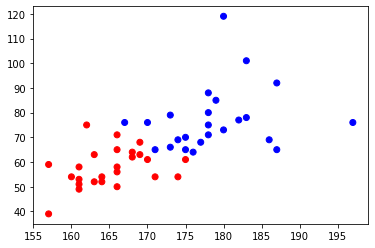

In [176]:
plt.scatter(davis_train["height"], davis_train["weight"], c=davis_y_train, cmap=lcm)

In [177]:
logreg_davis = linear_model.LogisticRegression().fit(davis_s_train,davis_y_train)

In [185]:
xx,yy = np.mgrid[davis_s_train[:,0].min():davis_s_train[:,0].max():100j,
                davis_s_train[:,1].min():davis_s_train[:,1].max():100j]

In [186]:
xx_yy = np.column_stack((xx.ravel(),yy.ravel()))

In [187]:
xx_yy_pred = logreg_davis.predict(xx_yy)

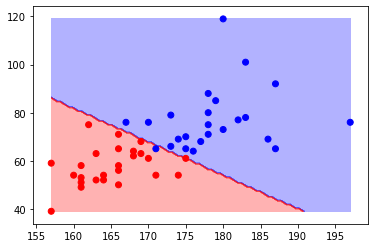

In [188]:
plt.contourf(xx,yy,xx_yy_pred.reshape(xx.shape), cmap=lcm, alpha=0.3)
plt.scatter(davis_train["height"], davis_train["weight"], c=davis_y_train, cmap=lcm)

In [ ]:
logreg_davis.predict

In [159]:
logreg = linear_model.LogisticRegression()

In [161]:
logreg.fit(X_train, ng_train.target)

c:\users\ivan\programming\general37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [162]:
lg_pred = logreg.predict(X_test)

In [163]:
print(metrics.classification_report(ng_test.target, lg_pred, target_names=ng_train.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.78      0.71      0.74       319
           comp.graphics       0.66      0.75      0.70       389
 comp.os.ms-windows.misc       0.73      0.69      0.71       394
comp.sys.ibm.pc.hardware       0.64      0.70      0.67       392
   comp.sys.mac.hardware       0.75      0.79      0.77       385
          comp.windows.x       0.81      0.71      0.76       395
            misc.forsale       0.77      0.87      0.82       390
               rec.autos       0.86      0.86      0.86       396
         rec.motorcycles       0.91      0.91      0.91       398
      rec.sport.baseball       0.87      0.88      0.88       397
        rec.sport.hockey       0.91      0.94      0.93       399
               sci.crypt       0.92      0.85      0.88       396
         sci.electronics       0.66      0.70      0.68       393
                 sci.med       0.83      0.80      0.82       396
         

In [164]:
logreg.coef_.shape

(20, 20000)

In [165]:
for c in range(len(logreg.coef_)):
    print(ng_train.target_names[c])
    weights = logreg.coef_[c]
    sorted_desc = (-weights).argsort()
#     for idx in sorted_desc[:100]:
    print([feature_names[idx] for idx in sorted_desc[:100]])

alt.atheism
['keith', 'bible', 'atheists', 'atheism', 'okcforum', 'believing', 'god', 'islamic', 'mathew', 'crchh410', 'wingate', 'psuvm', 'osrhe', 'pope', 'caltech', 'umd', 'cobb', 'tammy', 'psu', 'jaeger', 'rushdie', 'mangoe', 'thoughts', 'book', 'wwc', 'benedikt', 'free', 'dan', 'psilink', 'mantis', 'political', 'maddi', 'damnation', 'post', 'tek', 'saturn', 'thing', 'prepared', 'lunatic', 'religious', 'article', 'humans', 'freedom', 'charley', 'eternal', 'walla', 'peace', 'religion', 'au', 'gregg', 'koresh', 'sandvik', 'conner', 'said', 'bnr', 'penn', 'kmr4', '12', 'bobby', 'livesey', 'rice', 'wesleyan', 'people', 'genocide', 'example', 'uk', 'halat', 'atheist', 'hell', 'lord', 'cwru', 'p00261', 'lippard', 'liar', 'say', 'mary', 'penalty', 'mozumder', 'bissell', 'germany', 'compaq', 'cco', 'sgi', 'faq', 'princeton', 'solntze', 'jon', 'strom', 'risen', 'hausmann', 'scouts', 'schneider', 'ico', 'wpd', 'newton', 'jesus', 'bsa', 'healta', 'wrote', 'perfect']
comp.graphics
['graphics', 